### Project 1 MTA 

**Import packages** 

In [31]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

**Data Collection**

In [2]:
def get_data(): 
    '''Function to retrieve data from MTA web page.
    Append multiple files of weekly data into one dataframe
    assign column names'''
    data_set = pd.DataFrame()
    dates = [190504, 190511, 190518, 190525]
    for i in dates: 
        link = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_" + str(i) + ".txt"
        data_set = data_set.append(pd.read_csv(link, header=None, skiprows=[0], dtype = {'EXITS' : int, 'ENTRIES' : int}))
        i += 1
    #add a header out of loop 
    data_set.columns = ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISON','DATE','TIME', 'DESC','ENTRIES', 'EXITS']
    return data_set
df = get_data()

In [3]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISON,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,00:00:00,REGULAR,7035249,2384833
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,04:00:00,REGULAR,7035269,2384840
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,08:00:00,REGULAR,7035292,2384875
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,12:00:00,REGULAR,7035392,2384951
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,16:00:00,REGULAR,7035651,2385020


**Data Cleaning**

The data comes in cumulative 4 hour buckets by turstile by day.calculate the entry differences rather than the cummulative 

In [4]:
df["entry_diffs"] = df["ENTRIES"].diff()
df['exit_diffs'] = df['EXITS'].diff()

Remove unwanted entry and exit data 

In [5]:
# Delete these row indexes from dataFrame

'''
Some of the indexes have both negative entries and exits such as 44.  When we drop entries first, 44 gets
dropped.  Then when we go back and try to drop it again because it has a negative exit, it fails.

So we just change the order:
1. Find negative entries
2. Drop them
3. Find negative exits out of the ones that still remain
4. Drop them
'''
entry_neg = df[ df['entry_diffs'] < 0].index
df.drop(entry_neg , inplace=True)

exit_neg= df[ df['exit_diffs'] < 0].index
df.drop(exit_neg, inplace=True)

Drop unwanted columns 

In [6]:
df = df.dropna(how = 'any')

In [7]:
df = df.drop(columns = ['C/A','UNIT','LINENAME','DIVISON','DESC', 'ENTRIES', 'EXITS'])

Get the net traffic from the entry and exitdifference 

In [8]:
df['NET TRAFFIC'] = df['entry_diffs']+ df['exit_diffs']
df.head()

,SCP,STATION,DATE,TIME,entry_diffs,exit_diffs,NET TRAFFIC
1,02-00-00,59 ST,04/27/2019,04:00:00,20.0,7.0,27.0
2,02-00-00,59 ST,04/27/2019,08:00:00,23.0,35.0,58.0
3,02-00-00,59 ST,04/27/2019,12:00:00,100.0,76.0,176.0
4,02-00-00,59 ST,04/27/2019,16:00:00,259.0,69.0,328.0
5,02-00-00,59 ST,04/27/2019,20:00:00,279.0,50.0,329.0


Remove outliers from net traffice data

In [9]:
net_traffic_large= df[df['NET TRAFFIC'] > 8000].index
df.drop(net_traffic_large, inplace=True)

Convert hte date time data from object dataype to datetime data type.  Create a date time column and a day of week column. Note use of .weekday_name to include day of week rather than numeric value.

In [10]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['DAY'] = df['DATE'].dt.weekday_name
df

,SCP,STATION,DATE,TIME,entry_diffs,exit_diffs,NET TRAFFIC,DAY
1,02-00-00,59 ST,2019-04-27,04:00:00,20.0,7.0,27.0,Saturday
2,02-00-00,59 ST,2019-04-27,08:00:00,23.0,35.0,58.0,Saturday
3,02-00-00,59 ST,2019-04-27,12:00:00,100.0,76.0,176.0,Saturday
4,02-00-00,59 ST,2019-04-27,16:00:00,259.0,69.0,328.0,Saturday
5,02-00-00,59 ST,2019-04-27,20:00:00,279.0,50.0,329.0,Saturday
6,02-00-00,59 ST,2019-04-28,00:00:00,170.0,17.0,187.0,Sunday
7,02-00-00,59 ST,2019-04-28,04:00:00,19.0,1.0,20.0,Sunday
8,02-00-00,59 ST,2019-04-28,08:00:00,6.0,15.0,21.0,Sunday
9,02-00-00,59 ST,2019-04-28,12:00:00,72.0,52.0,124.0,Sunday
10,02-00-00,59 ST,2019-04-28,16:00:00,175.0,43.0,218.0,Sunday


### EDA

In [11]:
df.describe()

,entry_diffs,exit_diffs,NET TRAFFIC
count,713367.000000,713367.000000,713367.000000
mean,176.265202,138.688346,314.953547
std,256.751724,235.104677,394.437439
min,0.000000,0.000000,0.000000
25%,10.000000,8.000000,28.000000
50%,73.000000,53.000000,172.000000
75%,242.000000,169.000000,463.000000
max,6646.000000,7269.000000,7968.000000


In [12]:
#Identify the highest traffic stations by Net Traffic
df_grouped = df.groupby(['STATION',]).sum().sort_values('NET TRAFFIC', ascending=False)

In [32]:
df_grouped.head()

,entry_diffs,exit_diffs,NET TRAFFIC
STATION,,,
34 ST-PENN STA,3606374.0,3386367.0,6992741.0
GRD CNTRL-42 ST,3142710.0,2632388.0,5775098.0
14 ST-UNION SQ,2408824.0,2240300.0,4649124.0
34 ST-HERALD SQ,2293322.0,2216024.0,4509346.0
TIMES SQ-42 ST,2139458.0,2069860.0,4209318.0


In [14]:
df_sample = df_grouped.head(10)

In [15]:
df_sample.head()

,entry_diffs,exit_diffs,NET TRAFFIC
STATION,,,
34 ST-PENN STA,3606374.0,3386367.0,6992741.0
GRD CNTRL-42 ST,3142710.0,2632388.0,5775098.0
14 ST-UNION SQ,2408824.0,2240300.0,4649124.0
34 ST-HERALD SQ,2293322.0,2216024.0,4509346.0
TIMES SQ-42 ST,2139458.0,2069860.0,4209318.0
23 ST,2439211.0,1754568.0,4193779.0
FULTON ST,2133169.0,1772065.0,3905234.0
86 ST,1784044.0,1673746.0,3457790.0
42 ST-PORT AUTH,1813151.0,1579881.0,3393032.0


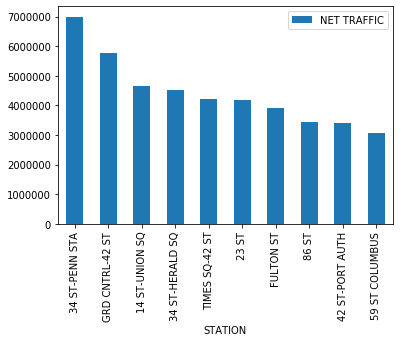

In [16]:
df_sample.plot(kind = 'bar', y='NET TRAFFIC', use_index=True)

In [33]:
#Create separate df with top stations
df_topOne = df[(df['STATION'] == '34 ST-PENN STA')]
df_topTwo = df[(df['STATION'] == 'GRD CNTRL-42 ST')]
df_topThree = df[(df['STATION'] == '34 ST-HERALD SQ')]
df_topFour = df[(df['STATION'] == '23 ST')]
df_topFive = df[(df['STATION'] == '14 ST-UNION SQ')]
df_topSix = df[(df['STATION'] == 'FULTON ST')]
df_top = pd.concat([df_topOne, df_topTwo, df_topThree, df_topFour, df_topFive, df_topSix], axis=0)
df_top.head(10)

,SCP,STATION,DATE,TIME,entry_diffs,exit_diffs,NET TRAFFIC,DAY
52874,00-00-00,34 ST-PENN STA,2019-04-28,16:00:00,75.0,173.0,248.0,Sunday
52876,00-00-00,34 ST-PENN STA,2019-04-29,00:00:00,40.0,41.0,81.0,Monday
52877,00-00-00,34 ST-PENN STA,2019-04-29,04:00:00,6.0,3.0,9.0,Monday
52878,00-00-00,34 ST-PENN STA,2019-04-29,08:00:00,171.0,186.0,357.0,Monday
52879,00-00-00,34 ST-PENN STA,2019-04-29,12:00:00,281.0,815.0,1096.0,Monday
52880,00-00-00,34 ST-PENN STA,2019-04-29,16:00:00,85.0,315.0,400.0,Monday
52881,00-00-00,34 ST-PENN STA,2019-04-29,20:00:00,131.0,834.0,965.0,Monday
52882,00-00-00,34 ST-PENN STA,2019-04-30,00:00:00,36.0,96.0,132.0,Tuesday
52883,00-00-00,34 ST-PENN STA,2019-04-30,04:00:00,4.0,1.0,5.0,Tuesday
52884,00-00-00,34 ST-PENN STA,2019-04-30,08:00:00,193.0,191.0,384.0,Tuesday


In [18]:
#Isolate date from time and convert to datetime objects for analysis by time buckets
df_topOne['TIME'] = pd.to_datetime(df_topOne['TIME'], format = '%H:%M:%S')
df_topOne['HOUR'] = df_topOne['TIME'].dt.hour

df_topTwo['TIME'] = pd.to_datetime(df_topTwo['TIME'], format = '%H:%M:%S')
df_topTwo['HOUR'] = df_topTwo['TIME'].dt.hour

df_topThree['TIME'] = pd.to_datetime(df_topThree['TIME'], format = '%H:%M:%S')
df_topThree['HOUR'] = df_topThree['TIME'].dt.hour

df_topFour['TIME'] = pd.to_datetime(df_topFour['TIME'], format = '%H:%M:%S')
df_topFour['HOUR'] = df_topFour['TIME'].dt.hour

df_topFive['TIME'] = pd.to_datetime(df_topFive['TIME'], format = '%H:%M:%S')
df_topFive['HOUR'] = df_topFive['TIME'].dt.hour

df_topSix['TIME'] = pd.to_datetime(df_topSix['TIME'], format = '%H:%M:%S')
df_topSix['HOUR'] = df_topSix['TIME'].dt.hour

/Users/mariascott/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/mariascott/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/mariascott/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [19]:
#use cut function and bin parameter to divide data into time buckets
bins = [0,6,10,14,18,22,24]
labels = ['dawn','morning', 'late-morning', 'afternoon', 'evening','night']
df_topOne['TIME FRAME'] = pd.cut(df_topOne['HOUR'], bins=bins, labels=labels)
df_topTwo['TIME FRAME'] = pd.cut(df_topTwo['HOUR'], bins=bins, labels=labels)
df_topThree['TIME FRAME'] = pd.cut(df_topThree['HOUR'], bins=bins, labels=labels)
df_topFour['TIME FRAME'] = pd.cut(df_topFour['HOUR'], bins=bins, labels=labels)
df_topFive['TIME FRAME'] = pd.cut(df_topFive['HOUR'], bins=bins, labels=labels)
df_topSix['TIME FRAME'] = pd.cut(df_topSix['HOUR'], bins=bins, labels=labels)

/Users/mariascott/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mariascott/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/mariascott/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [20]:
#Drop NaN values discovered NaN values in data 
df_topOne = df_topOne.dropna(how = 'any')
df_topTwo = df_topTwo.dropna(how = 'any')
df_topThree = df_topThree.dropna(how = 'any')
df_topFour = df_topFour.dropna(how = 'any')
df_topFive = df_topFive.dropna(how = 'any')
df_topSix = df_topSix.dropna(how = 'any')


df_topOne['AVE_NET TRAFFIC'] = df_topOne['NET TRAFFIC'].div(28)
df_topTwo['AVE_NET TRAFFIC'] = df_topTwo['NET TRAFFIC'].div(28)
df_topThree['AVE_NET TRAFFIC'] = df_topThree['NET TRAFFIC'].div(28)
df_topFour['AVE_NET TRAFFIC'] = df_topFour['NET TRAFFIC'].div(28)
df_topFive['AVE_NET TRAFFIC'] = df_topFive['NET TRAFFIC'].div(28)
df_topSix['AVE_NET TRAFFIC'] = df_topSix['NET TRAFFIC'].div(28)



In [21]:
df_topOne.head(5)

,SCP,STATION,DATE,TIME,entry_diffs,exit_diffs,NET TRAFFIC,DAY,HOUR,TIME FRAME,AVE_NET TRAFFIC
52874,00-00-00,34 ST-PENN STA,2019-04-28,1900-01-01 16:00:00,75.0,173.0,248.0,Sunday,16,afternoon,8.857143
52877,00-00-00,34 ST-PENN STA,2019-04-29,1900-01-01 04:00:00,6.0,3.0,9.0,Monday,4,dawn,0.321429
52878,00-00-00,34 ST-PENN STA,2019-04-29,1900-01-01 08:00:00,171.0,186.0,357.0,Monday,8,morning,12.750000
52879,00-00-00,34 ST-PENN STA,2019-04-29,1900-01-01 12:00:00,281.0,815.0,1096.0,Monday,12,late-morning,39.142857
52880,00-00-00,34 ST-PENN STA,2019-04-29,1900-01-01 16:00:00,85.0,315.0,400.0,Monday,16,afternoon,14.285714


In [22]:
#group each station by 'TIME FRAME'
df_groupOne = df_topOne.groupby(['TIME FRAME']).sum().sort_values('NET TRAFFIC', ascending=False)
df_groupTwo = df_topTwo.groupby(['TIME FRAME']).sum().sort_values('NET TRAFFIC', ascending=False)
df_groupThree = df_topThree.groupby(['TIME FRAME']).sum().sort_values('NET TRAFFIC', ascending=False)
df_groupFour = df_topFour.groupby(['TIME FRAME']).sum().sort_values('NET TRAFFIC', ascending=False)
df_groupFive = df_topFive.groupby(['TIME FRAME']).sum().sort_values('NET TRAFFIC', ascending=False)
df_groupSix = df_topSix.groupby(['TIME FRAME']).sum().sort_values('NET TRAFFIC', ascending=False)

In [23]:
#group each station by day
df_groupOne_Day = df_topOne.groupby(['DAY']).sum().sort_values('NET TRAFFIC', ascending=False)
df_groupTwo_Day = df_topTwo.groupby(['DAY']).sum().sort_values('NET TRAFFIC', ascending=False)
df_groupThree_Day = df_topThree.groupby(['DAY']).sum().sort_values('NET TRAFFIC', ascending=False)
df_groupFour_Day = df_topFour.groupby(['DAY']).sum().sort_values('NET TRAFFIC', ascending=False)
df_groupFive_Day = df_topFive.groupby(['DAY']).sum().sort_values('NET TRAFFIC', ascending=False)
df_groupSix_Day = df_topSix.groupby(['DAY']).sum().sort_values('NET TRAFFIC', ascending=False)

In [24]:
#Create a column for Average Day Traffic based on Station Net Traffic
df_groupOne_Day['AVE_DAY_TRAFFIC'] = df_groupOne_Day['NET TRAFFIC'].div(4)
df_groupTwo_Day['AVE_DAY_TRAFFIC'] = df_groupTwo_Day['NET TRAFFIC'].div(4)
df_groupThree_Day['AVE_DAY_TRAFFIC'] = df_groupThree_Day['NET TRAFFIC'].div(4)
df_groupFour_Day['AVE_DAY_TRAFFIC'] = df_groupFour_Day['NET TRAFFIC'].div(4)
df_groupFive_Day['AVE_DAY_TRAFFIC'] = df_groupFive_Day['NET TRAFFIC'].div(4)
df_groupSix_Day['AVE_DAY_TRAFFIC'] = df_groupSix_Day['NET TRAFFIC'].div(4)


df_groupOne_Day.head(7)

,entry_diffs,exit_diffs,NET TRAFFIC,HOUR,AVE_NET TRAFFIC,AVE_DAY_TRAFFIC
DAY,,,,,,
Wednesday,585108.0,540807.0,1125915.0,22818,40211.250000,281478.75
Tuesday,578065.0,545168.0,1123233.0,23185,40115.464286,280808.25
Monday,576994.0,532634.0,1109628.0,23326,39629.571429,277407.00
Thursday,562417.0,528464.0,1090881.0,21624,38960.035714,272720.25
Friday,529354.0,527159.0,1056513.0,22776,37732.607143,264128.25
Saturday,278558.0,282722.0,561280.0,21656,20045.714286,140320.00
Sunday,243262.0,231926.0,475188.0,21254,16971.000000,118797.00


In [25]:
%matplotlib inline

In [26]:
df_groupSix_Day.head(7)

,entry_diffs,exit_diffs,NET TRAFFIC,HOUR,AVE_NET TRAFFIC,AVE_DAY_TRAFFIC
DAY,,,,,,
Thursday,393868.0,328625.0,722493.0,26019,25803.321429,180623.25
Wednesday,381271.0,317238.0,698509.0,25377,24946.750000,174627.25
Tuesday,374227.0,311717.0,685944.0,25411,24498.000000,171486.00
Friday,360896.0,299207.0,660103.0,25599,23575.107143,165025.75
Monday,353253.0,290251.0,643504.0,25106,22982.285714,160876.00
Saturday,139652.0,119355.0,259007.0,23675,9250.250000,64751.75
Sunday,114941.0,94236.0,209177.0,24898,7470.607143,52294.25


0-5 : dawn 5
6-9 : morning 3
10-13 : late-morning 3
14-17 : early - afternoon 3
18-21 : after work 3
22-24: night 2

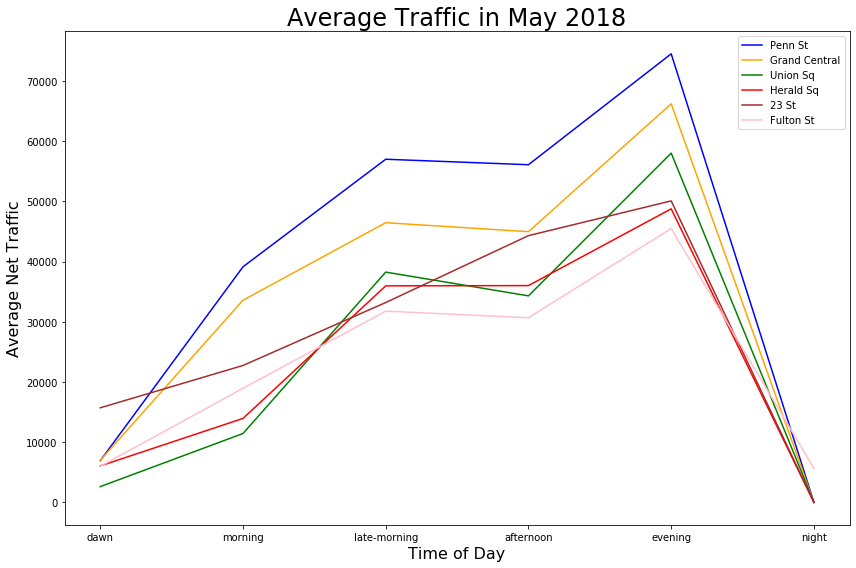

In [27]:
#Subway traffic in May 2018 (Time Frame)
import seaborn as sns
plot_df1 = df_groupOne.reset_index()
plot_df2 = df_groupTwo.reset_index()
plot_df3 = df_groupThree.reset_index()
plot_df4 = df_groupFour.reset_index()
plot_df5 = df_groupFive.reset_index()
plot_df6 = df_groupSix.reset_index()


fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x='TIME FRAME', y='AVE_NET TRAFFIC', data=plot_df1, label = 'Penn St', color = 'blue') 
sns.lineplot(x='TIME FRAME', y='AVE_NET TRAFFIC', data=plot_df2, label = 'Grand Central',color = 'orange')
sns.lineplot(x='TIME FRAME', y='AVE_NET TRAFFIC', data=plot_df3, label = 'Union Sq',color = 'green') 
sns.lineplot(x='TIME FRAME', y='AVE_NET TRAFFIC', data=plot_df4, label = 'Herald Sq',color = 'red')
sns.lineplot(x='TIME FRAME', y='AVE_NET TRAFFIC', data=plot_df5, label = '23 St',color = 'brown') 
sns.lineplot(x='TIME FRAME', y='AVE_NET TRAFFIC', data=plot_df6, label = 'Fulton St',color = 'pink')

ax.set_xlabel("Time of Day",fontsize=16)
ax.set_ylabel("Average Net Traffic",fontsize=16)
plt.title('Average Traffic in May 2018', fontsize=24)
plt.tight_layout()
plt.savefig(fname='time_ave_traffic', dpi = 150)

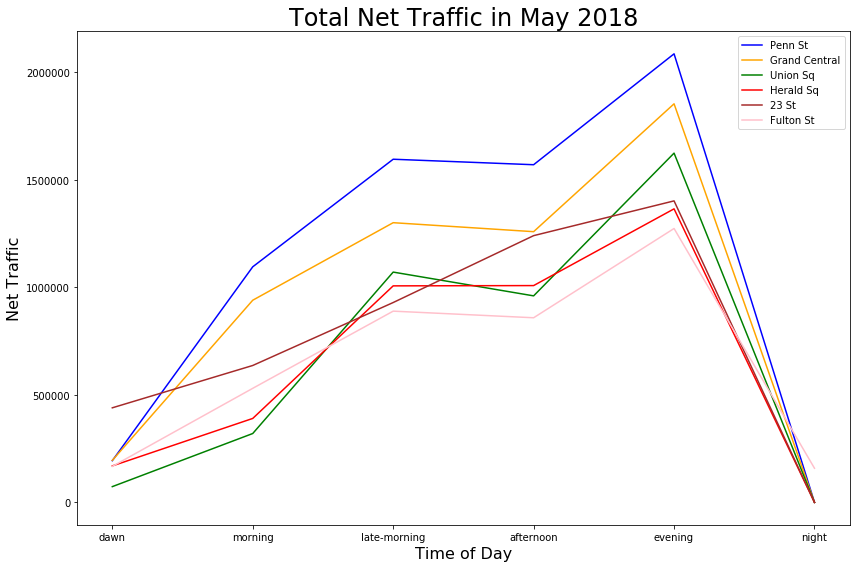

In [28]:
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x='TIME FRAME', y='NET TRAFFIC', data=plot_df1, label = 'Penn St', color = 'blue') 
sns.lineplot(x='TIME FRAME', y='NET TRAFFIC', data=plot_df2, label = 'Grand Central',color = 'orange')
sns.lineplot(x='TIME FRAME', y='NET TRAFFIC', data=plot_df3, label = 'Union Sq',color = 'green') 
sns.lineplot(x='TIME FRAME', y='NET TRAFFIC', data=plot_df4, label = 'Herald Sq',color = 'red')
sns.lineplot(x='TIME FRAME', y='NET TRAFFIC', data=plot_df5, label = '23 St',color = 'brown') 
sns.lineplot(x='TIME FRAME', y='NET TRAFFIC', data=plot_df6, label = 'Fulton St',color = 'pink')

ax.set_xlabel("Time of Day",fontsize=16)
ax.set_ylabel("Net Traffic",fontsize=16)
plt.title('Total Net Traffic in May 2018', fontsize=24)
plt.tight_layout()
plt.savefig(fname='time_traffic', dpi = 150)

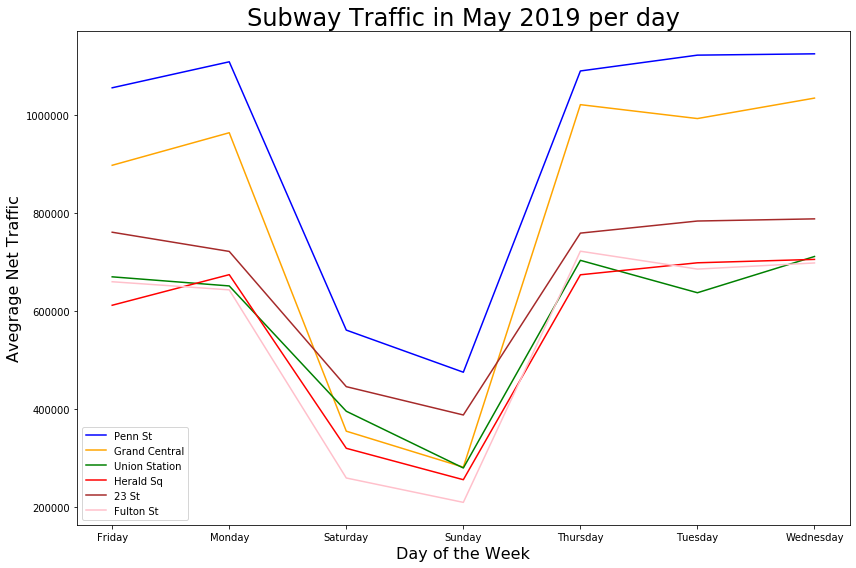

In [29]:
#Subway Traffic in May 2019 by Weekday
plot_df1D = df_groupOne_Day.reset_index()
plot_df2D = df_groupTwo_Day.reset_index()
plot_df3D = df_groupThree_Day.reset_index()
plot_df4D = df_groupFour_Day.reset_index()
plot_df5D = df_groupFive_Day.reset_index()
plot_df6D = df_groupSix_Day.reset_index()



fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x='DAY', y='NET TRAFFIC', data=plot_df1D, label = 'Penn St', color = 'blue') 
sns.lineplot(x='DAY', y='NET TRAFFIC', data=plot_df2D, label = 'Grand Central',color = 'orange')
sns.lineplot(x='DAY', y='NET TRAFFIC', data=plot_df3D, label = 'Union Station',color = 'green') 
sns.lineplot(x='DAY', y='NET TRAFFIC', data=plot_df4D, label = 'Herald Sq',color = 'red')
sns.lineplot(x='DAY', y='NET TRAFFIC', data=plot_df5D, label = '23 St',color = 'brown') 
sns.lineplot(x='DAY', y='NET TRAFFIC', data=plot_df6D, label = 'Fulton St',color = 'pink')

ax.set_xlabel("Day of the Week",fontsize=16)
ax.set_ylabel("Avegrage Net Traffic",fontsize=16)
plt.title('Subway Traffic in May 2019 per day', fontsize=24)
plt.tight_layout()
plt.savefig(fname='day_traffic', dpi = 150)

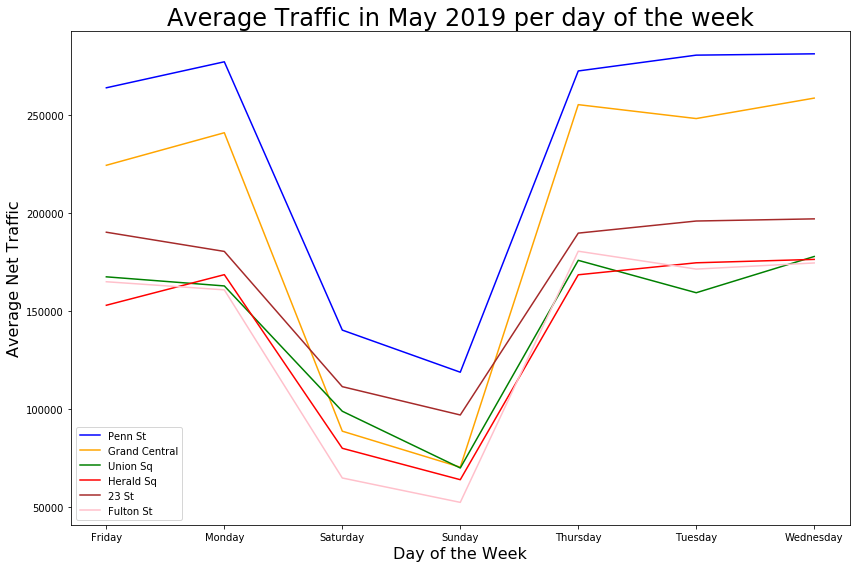

In [30]:
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x='DAY', y='AVE_DAY_TRAFFIC', data=plot_df1D, label = 'Penn St', color = 'blue') 
sns.lineplot(x='DAY', y='AVE_DAY_TRAFFIC', data=plot_df2D, label = 'Grand Central',color = 'orange')
sns.lineplot(x='DAY', y='AVE_DAY_TRAFFIC', data=plot_df3D, label = 'Union Sq',color = 'green') 
sns.lineplot(x='DAY', y='AVE_DAY_TRAFFIC', data=plot_df4D, label = 'Herald Sq',color = 'red')
sns.lineplot(x='DAY', y='AVE_DAY_TRAFFIC', data=plot_df5D, label = '23 St',color = 'brown') 
sns.lineplot(x='DAY', y='AVE_DAY_TRAFFIC', data=plot_df6D, label = 'Fulton St',color = 'pink')

ax.set_xlabel("Day of the Week",fontsize=16)
ax.set_ylabel("Average Net Traffic",fontsize=16)
plt.title('Average Traffic in May 2019 per day of the week', fontsize=24)
plt.tight_layout()
plt.savefig(fname='day_ave_traffic', dpi = 150)